In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple decision boundary

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [9]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X_train, y_train)

In [10]:
predictions = knn_classifier.predict(X_test)
print("Predictions:", predictions)

Predictions: [0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1]


In [11]:
# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


C:\Users\DELL\AppData\Local\Temp\ipykernel_9900\916575119.py:2: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='x', s=50, edgecolor='k', label='Testing Data (Predicted)')


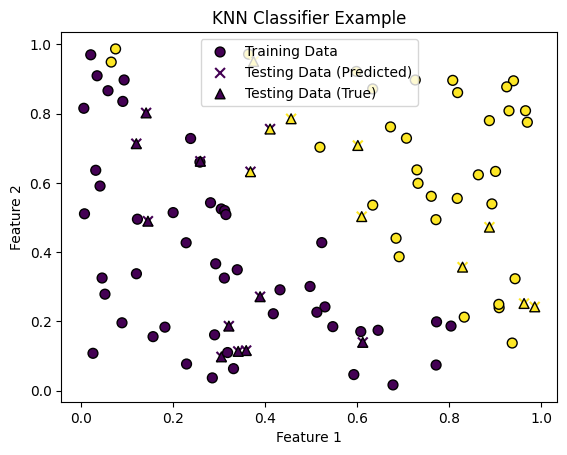

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', s=50, edgecolor='k', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='x', s=50, edgecolor='k', label='Testing Data (Predicted)')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='^', s=50, edgecolor='k', label='Testing Data (True)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier Example')
plt.legend()
plt.show()